In [1]:
#importing the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the train data
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

# Data cleaning

In [5]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
# Check the data
data.head()

,title,text,subject,date,target
0,FULL INTERVIEW: Donald Trump Gets Down To Busi...,Scott Pelley is a total a@@ during this interv...,politics,"Sep 28, 2015",fake
1,SHOCKER! CNN PANEL Rips On DNC Chair For His D...,What a shocker! A CNN panel rips on Tom Perez ...,left-news,"Apr 24, 2017",fake
2,Vice President Pence: Trump greatly concern ab...,WASHINGTON (Reuters) - U.S. Vice President Mik...,politicsNews,"September 10, 2017",true
3,HAS EUROPE GONE MAD? CONVICTED Terrorist Recru...,In their rush to make radical Muslims terroris...,left-news,"May 14, 2016",fake
4,HA! ANGRY FEMINIST SENATOR Attacks Trump/Pence...,I certainly hope Hillary picks Liz Warren for ...,politics,"Jul 16, 2016",fake


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


There are no null values and are object type data

In [10]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

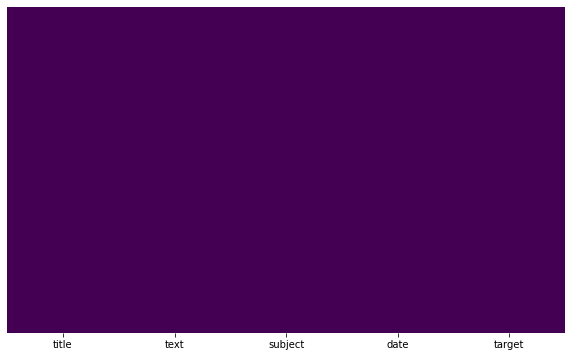

In [11]:
#Seeing the missing values via visualization
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis',)
plt.show()

There are no missing values in our dataset.So we will visualize the missing number in bar plot we have to import missingno python

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

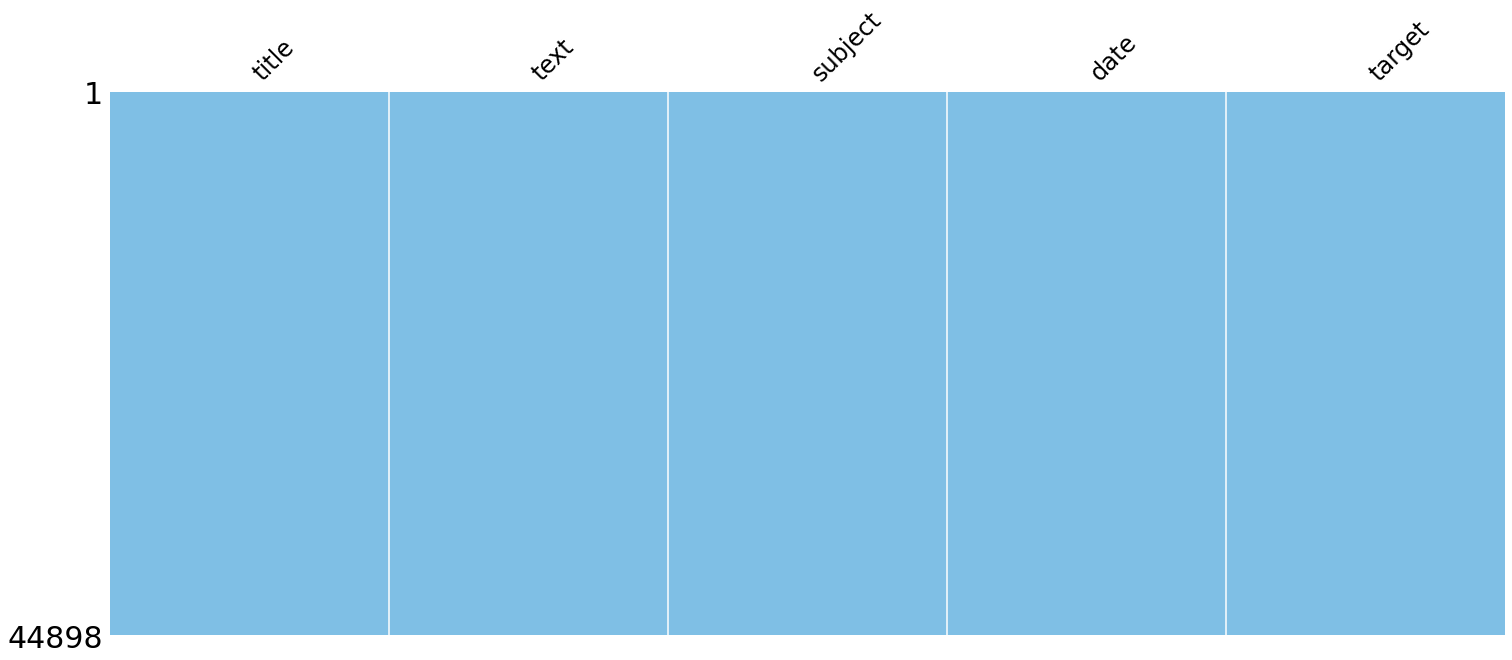

In [12]:
# Plotting the Missing value matrix
import missingno as mnso
plt.figure(figsize=(6,4))
mnso.matrix(data,color=(0.50, 0.75, 0.90),fontsize=24,sparkline=False)#Visualizing the data

<AxesSubplot:>

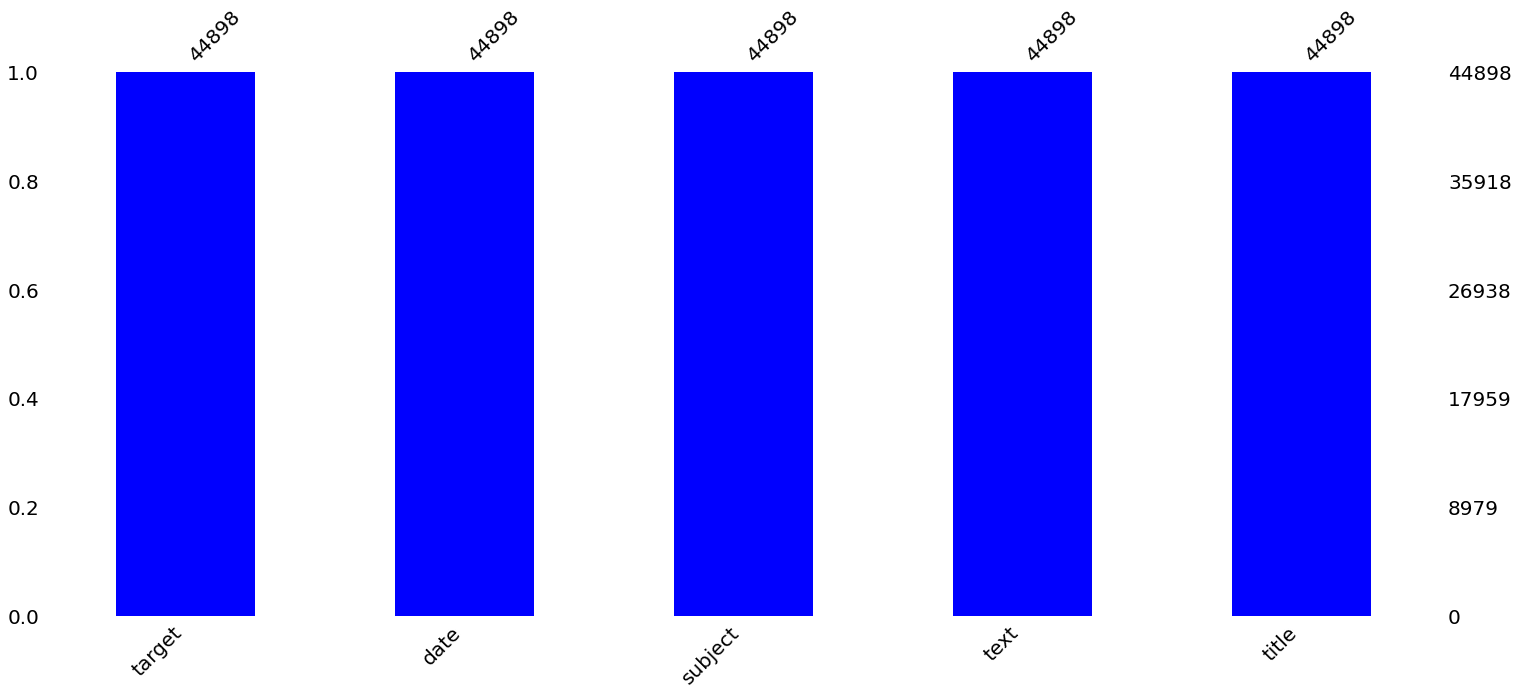

In [13]:
# Plotting the barplot of the null values.
import missingno as mnso
plt.figure(figsize=(12,6))
mnso.bar(data, fontsize=20,color='blue',sort='descending')

In [14]:
#checking unique values
data.text.nunique()

38646

There are "38646" unique comments in this dataset

# Summary Statistics

In [15]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,FULL INTERVIEW: Donald Trump Gets Down To Busi...,Scott Pelley is a total a@@ during this interv...,politics,fake
1,SHOCKER! CNN PANEL Rips On DNC Chair For His D...,What a shocker! A CNN panel rips on Tom Perez ...,left-news,fake
2,Vice President Pence: Trump greatly concern ab...,WASHINGTON (Reuters) - U.S. Vice President Mik...,politicsNews,true
3,HAS EUROPE GONE MAD? CONVICTED Terrorist Recru...,In their rush to make radical Muslims terroris...,left-news,fake
4,HA! ANGRY FEMINIST SENATOR Attacks Trump/Pence...,I certainly hope Hillary picks Liz Warren for ...,politics,fake


In [16]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Scott Pelley is a total a@@ during this interv...,politics,fake
1,What a shocker! A CNN panel rips on Tom Perez ...,left-news,fake
2,WASHINGTON (Reuters) - U.S. Vice President Mik...,politicsNews,true
3,In their rush to make radical Muslims terroris...,left-news,fake
4,I certainly hope Hillary picks Liz Warren for ...,politics,fake


In [17]:
# Checking the summary of object columns
data.describe(include=['object'])

,text,subject,target
count,44898,44898,44898
unique,38646,8,2
top,,politicsNews,fake
freq,627,11272,23481


Lets transform the features

In [18]:
#Printing the object data types and their unique values

for column in data.columns:
    if data[column].dtype==object:
        print("Seeing the Object features\n")
        print(str(column) + ' : ' + str(data[column].nunique()))
        print('************************************') 
    if data[column].dtype=='int64':
        print("Seeing the Interger features\n")
        print(str(column) + ' : ' + str(data[column].nunique()))
        print("Unique Values:",data[column].unique())
        print('************************************')

Seeing the Object features

text : 38646
************************************
Seeing the Object features

subject : 8
************************************
Seeing the Object features

target : 2
************************************


lets convert the caseletters

In [19]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,scott pelley is a total a@@ during this interv...,politics,fake
1,what a shocker! a cnn panel rips on tom perez ...,left-news,fake
2,washington (reuters) - u.s. vice president mik...,politicsNews,true
3,in their rush to make radical muslims terroris...,left-news,fake
4,i certainly hope hillary picks liz warren for ...,politics,fake


In [20]:
# Remove punctuation
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [21]:
# Check
data.head()

,text,subject,target
0,scott pelley is a total a during this intervie...,politics,fake
1,what a shocker a cnn panel rips on tom perez f...,left-news,fake
2,washington reuters us vice president mike pen...,politicsNews,true
3,in their rush to make radical muslims terroris...,left-news,fake
4,i certainly hope hillary picks liz warren for ...,politics,fake


In [22]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clickmoney\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [24]:
data.head()

,text,subject,target
0,scott pelley total interview wish 60 minutes h...,politics,fake
1,shocker cnn panel rips tom perez profanity lad...,left-news,fake
2,washington reuters us vice president mike penc...,politicsNews,true
3,rush make radical muslims terrorists feel thou...,left-news,fake
4,certainly hope hillary picks liz warren vp mis...,politics,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


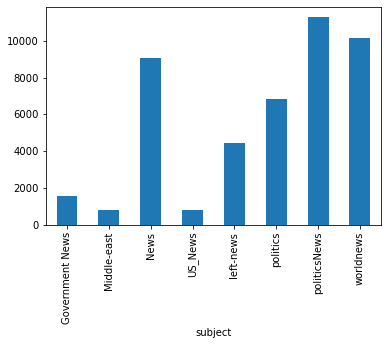

In [25]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

Politics and world news aricles are more 

target
fake    23481
true    21417
Name: text, dtype: int64


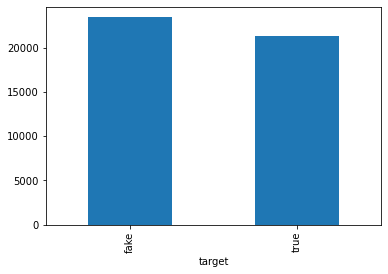

In [26]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

There are 23481 fake articles and 21417 articles in the dataset

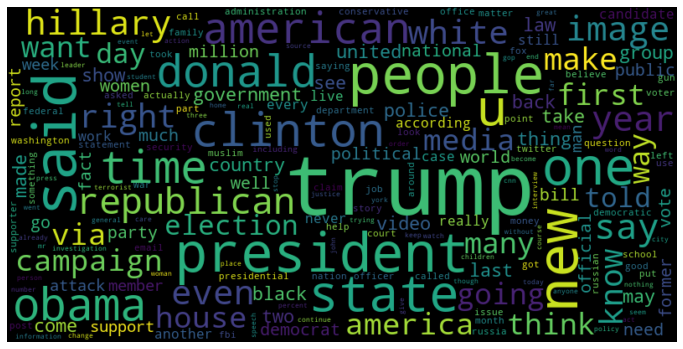

In [27]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 400,
                          max_font_size = 100,
                          collocations = False).generate(all_words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

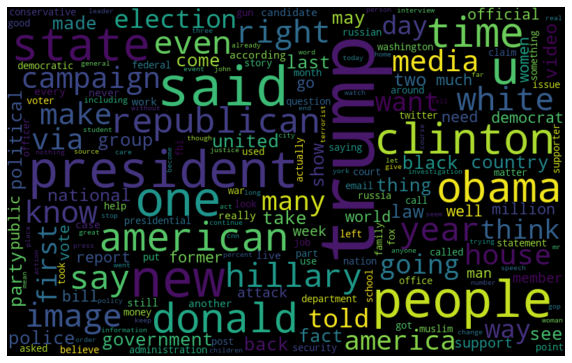

In [28]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

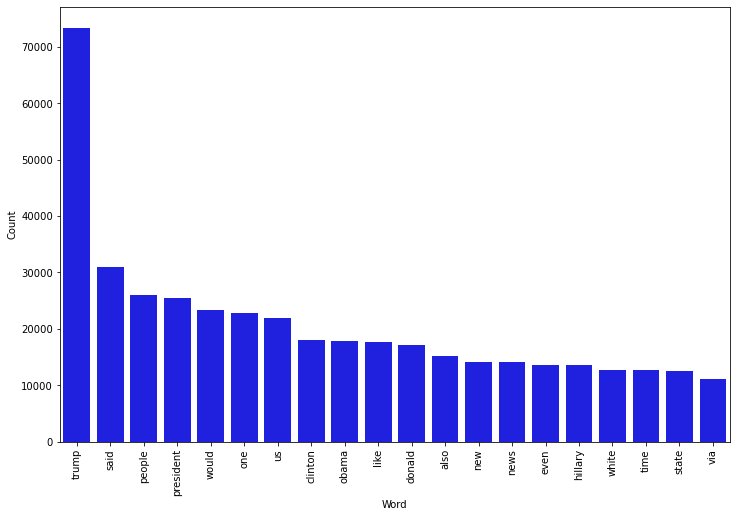

In [30]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

Morethan 70000 times "trump" is the most frequent word used in the fake news articles 

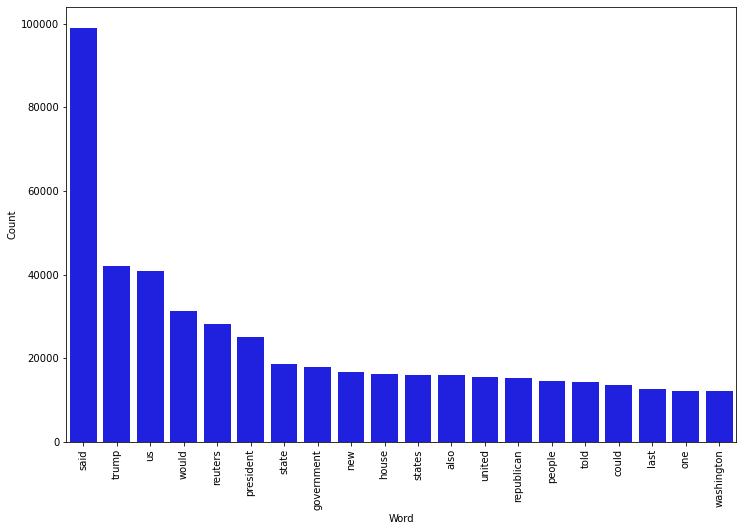

In [31]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

"said" is the most frequent word used in real news articles

# Model Selection

In [32]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Naive Bayes

In [34]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.43%


Confusion matrix, without normalization


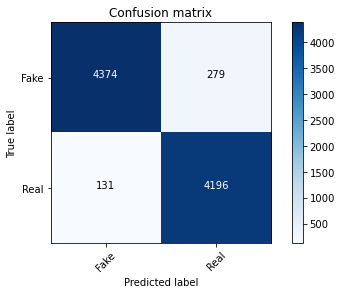

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic regression

In [36]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

from sklearn.metrics import accuracy_score

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.09%


Confusion matrix, without normalization


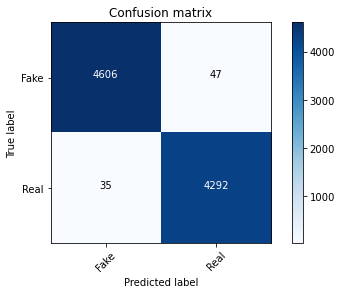

In [37]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree


In [38]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.57%


Confusion matrix, without normalization


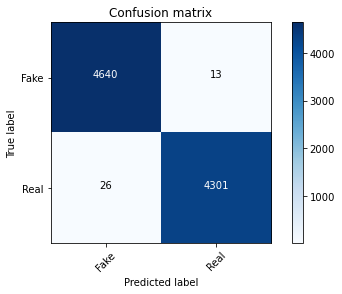

In [39]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.24%


Confusion matrix, without normalization


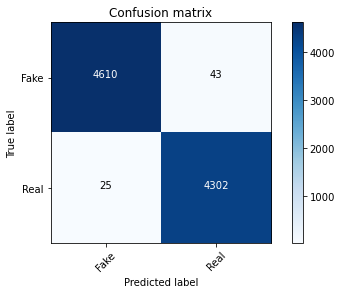

In [41]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# SVM


In [42]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.64%


Confusion matrix, without normalization


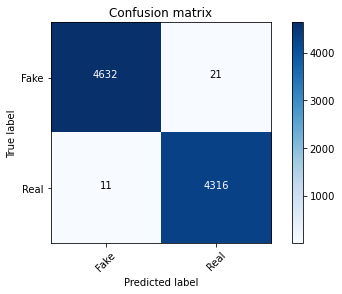

In [43]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models


([<matplotlib.axis.YTick at 0x2131c556a90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

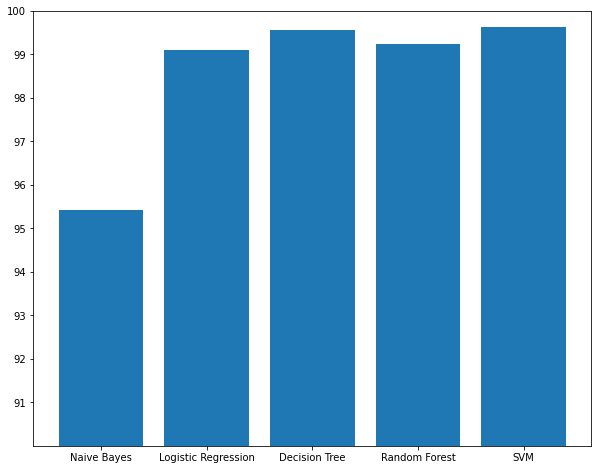

In [44]:
plt.figure(figsize=(10,8))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

# SVM performs 99.64% accuracy